### Transformation of Features
Feature Transformation is a technique we should always use regardless of the model we are using, whether it is a classification task or regression task, or be it an unsupervised learning model.

#####  What is Feature Transformation?
It is a technique by which we can boost our model performance. Feature transformation is a mathematical transformation in which we apply a mathematical formula to a particular column(feature) and transform the values which are useful for our further analysis, also called Feature Engineering.This transforamtion techniques can also be used for Feature Reduction.

##### Why Transformation of Features Are Required?
1. Improves model performance
2. Improve numerical stability, training process and model interpretability
3. Promotes robustness of model

###### Some examples of algorithms where feature scaling matters are:

- k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally
- k-means (see k-nearest neighbors)
- logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others
- linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you'd emphasize variables on "larger measurement scales" more.

There are many more cases.

#### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Trnasformation
7. Square Root Transformation
8. Exponential Trnasformation
9. Box Cox Transformation


In [1]:
import pandas as pd
import seaborn as sns

#### Preparing a DataFrame to try out All Features Transformation

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic=titanic[['pclass','age','fare','survived']]
titanic.head()

,pclass,age,fare,survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [4]:
titanic.age.isnull().sum()

177

In [5]:
titanic['age'].fillna(titanic.age.median(),inplace=True)

In [6]:
titanic.isnull().sum()

pclass      0
age         0
fare        0
survived    0
dtype: int64

In [7]:
### Independent and dependent features
X=titanic.iloc[:,0:-1]
y=titanic.iloc[:,-1]

In [8]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [9]:
X

,pclass,age,fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### Standard Scaler:
* StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
*	The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
*	If data is not normally distributed, this is not the best scaler to use.
*	The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

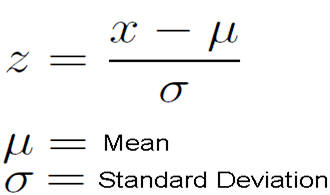

In [11]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)

In [13]:
X_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [14]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

In [15]:
### Model Building
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()

In [16]:
## fit() for training and predict for test
classification.fit(X_train_scaled,y_train)
classification.predict(X_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 29.,   9.,   9.,  23.,  50.,  63., 180.,  56.,  50.,  25.,  24.,
         27.,  16.,  15.,  10.,   5.,   0.,   3.,   1.,   1.]),
 array([-2.22455872, -1.91725548, -1.60995224, -1.30264901, -0.99534577,
        -0.68804253, -0.38073929, -0.07343606,  0.23386718,  0.54117042,
         0.84847366,  1.15577689,  1.46308013,  1.77038337,  2.07768661,
         2.38498985,  2.69229308,  2.99959632,  3.30689956,  3.6142028 ,
         3.92150603]),
 <BarContainer object of 20 artists>)

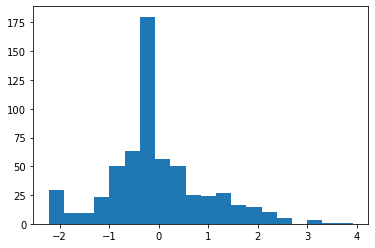

In [18]:
plt.hist(X_train_scaled[:,1],bins=20)

(array([384., 106.,  51.,  24.,   8.,   9.,   2.,   0.,   5.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62041562, -0.12240671,  0.37560221,  0.87361112,  1.37162003,
         1.86962894,  2.36763786,  2.86564677,  3.36365568,  3.8616646 ,
         4.35967351,  4.85768242,  5.35569133,  5.85370025,  6.35170916,
         6.84971807,  7.34772699,  7.8457359 ,  8.34374481,  8.84175372,
         9.33976264]),
 <BarContainer object of 20 artists>)

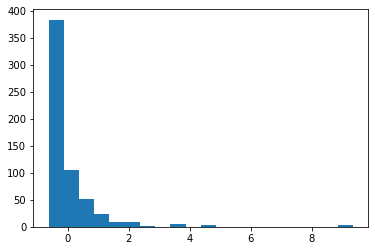

In [19]:
plt.hist(X_train_scaled[:,2],bins=20)

#####  Min Max Scaling (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)
- MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. This is done feature-wise in an independent way.
- The MinMax Scaling is that it is highly influenced by the maximum and minimum values in our data so if our data contains outliers it is going to be biased.
- The MinMaxScaler scaling might compress all inliers in a narrow range.

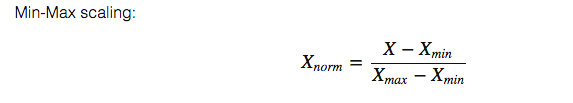
* <b>Min Max Scaling scales the values between 0 to 1.</b> 


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(X_train))
df_minmax.head()

,0,1,2
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


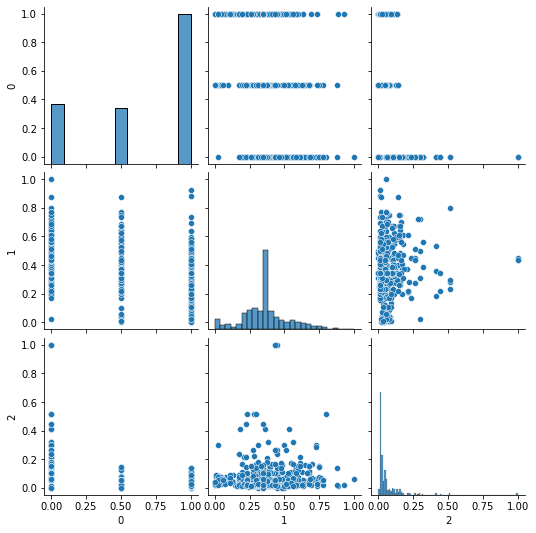

In [22]:
sns.pairplot(df_minmax)

#####  Robust Scaler
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

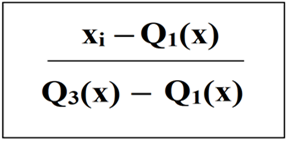

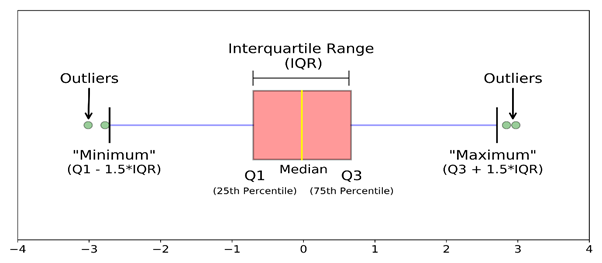

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(X_train))
df_robust_scaler.head()

,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [24]:
scaler.transform(X_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

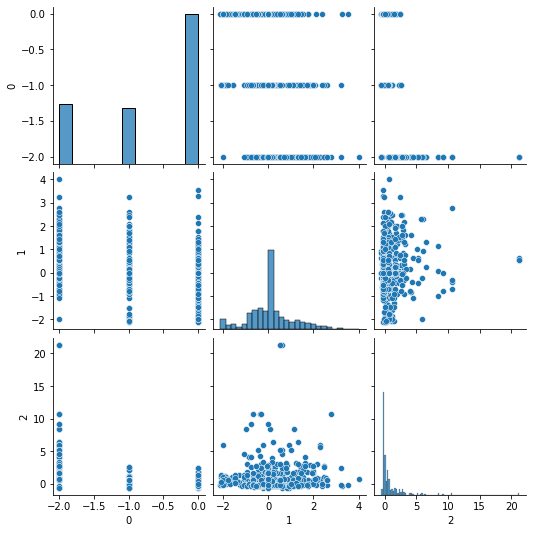

In [25]:
import seaborn as sns
sns.pairplot(df_robust_scaler)

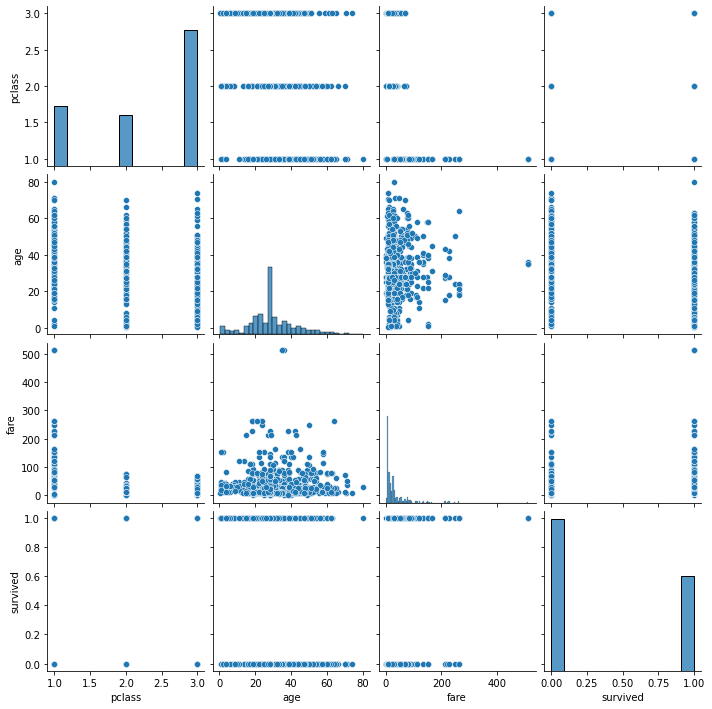

In [26]:
import seaborn as sns
sns.pairplot(titanic)

##### Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

In [27]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 

#### Q-Q plot
If you want to check whether feature is guassian or normal distributed

In [28]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

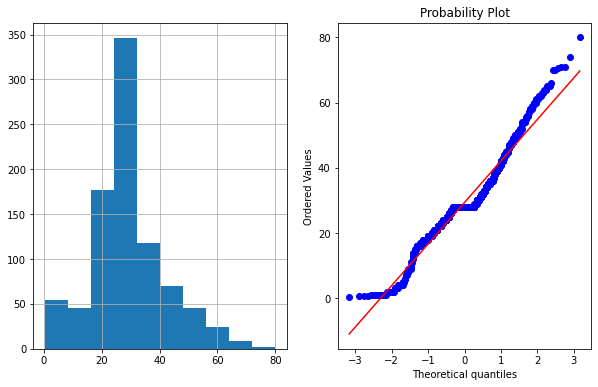

In [29]:
plot_data(titanic,'age')

##### Logarithmic Transformation
- Generally, these transformations make our data close to a normal distribution but are not able to exactly abide by a normal distribution.
- his transformation is not applied to those features which have negative values.

- This transformation is mostly applied to right-skewed data.

- Convert data from addictive Scale to multiplicative scale i,e, linearly distributed data.

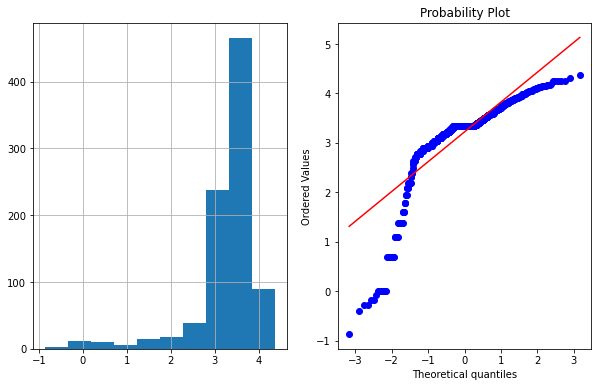

In [30]:
import numpy as np
titanic['age_log']=np.log(titanic['age'])
plot_data(titanic,'age_log')

#####  Reciprocal Trnasformation
- This transformation is not defined for zero.

- It is a powerful transformation with a radical effect.

- This transformation reverses the order among values of the same sign, so large values become smaller and vice-versa

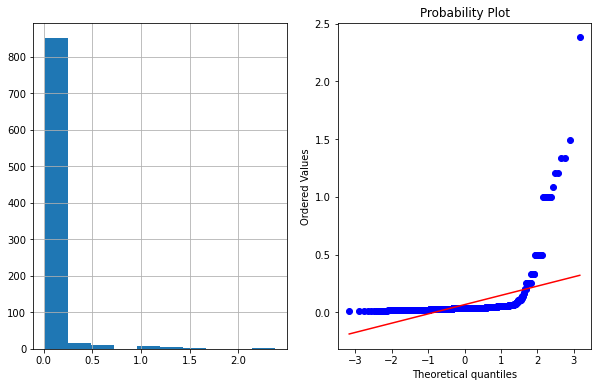

In [31]:
titanic['age_reciprocal']=1/titanic.age
plot_data(titanic,'age_reciprocal')

#####  Square Root Transformation
- The square root, x to x^(1/2) = sqrt(x), is a transformation with a moderate effect on distribution shape.

- This transformation is defined only for positive numbers.

- This transformation is weaker than Log Transformation.

- This can be used for reducing the skewness of right-skewed data  and also has the advantage that it can be applied to zero values.

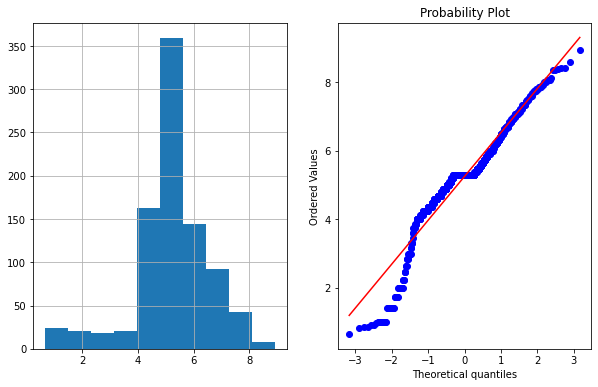

In [32]:
titanic['age_sqaure']=titanic.age**(1/2)
plot_data(titanic,'age_sqaure')

#####  Exponential Transformation

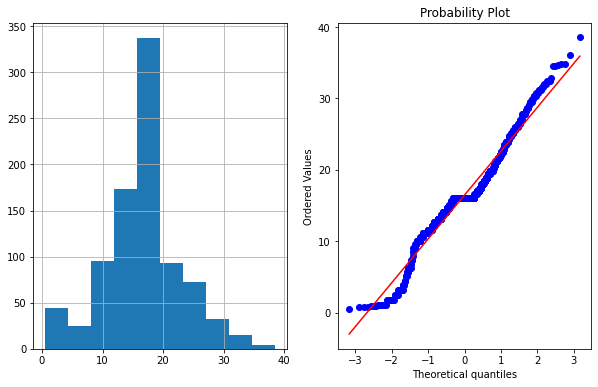

In [33]:

titanic['age_exponential']=titanic.age**(1/1.2)
plot_data(titanic,'age_exponential')

#####  BoxCOx Transformation
- Many machine learning algorithms prefer or perform better when numerical variables have a Gaussian probability distribution.
- Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.
- How to use the PowerTransform in scikit-learn to use the Box-Cox and Yeo-Johnson transforms when preparing data for predictive modeling.
- It is a power transform that assumes the values of the input variable to which it is applied are strictly positive. That means 0 and negative values are not supported.

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [34]:
titanic['age_Boxcox'],parameters=stat.boxcox(titanic['age'])

In [35]:
print(parameters)

0.7964531473656952


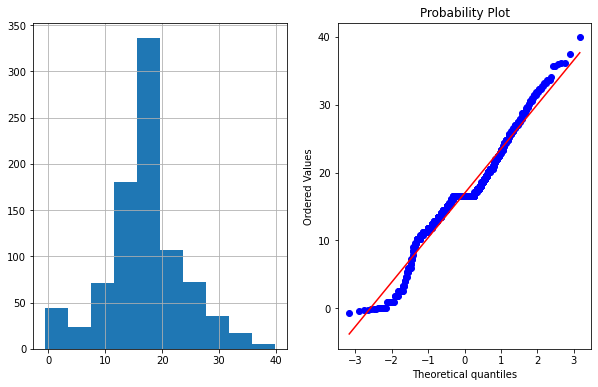

In [36]:
plot_data(titanic,'age_Boxcox')

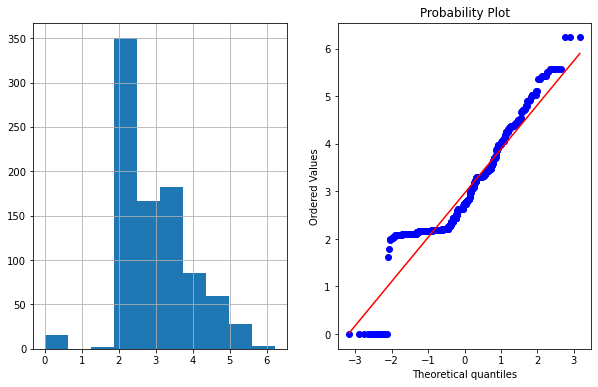

In [37]:
#### Fare
titanic['fare_log']=np.log1p(titanic['fare'])
plot_data(titanic,'fare_log')

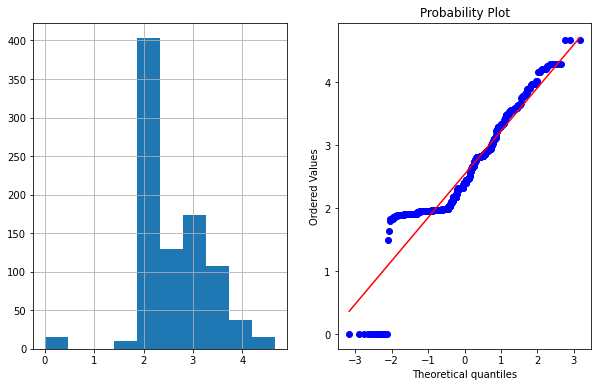

In [38]:
titanic['fare_Boxcox'],parameters=stat.boxcox(titanic['fare']+1)
plot_data(titanic,'fare_Boxcox')